<a href="https://colab.research.google.com/github/Maxwell619/AI-Coursework-2025/blob/master/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded_image = files.upload()

for filename in uploaded_image.keys():
  print(f'User uploaded file "{filename}"')

Saving Screenshot 2025-10-30 215240.png to Screenshot 2025-10-30 215240.png
Saving Screenshot 2025-11-04 214547.png to Screenshot 2025-11-04 214547.png
User uploaded file "Screenshot 2025-10-30 215240.png"
User uploaded file "Screenshot 2025-11-04 214547.png"


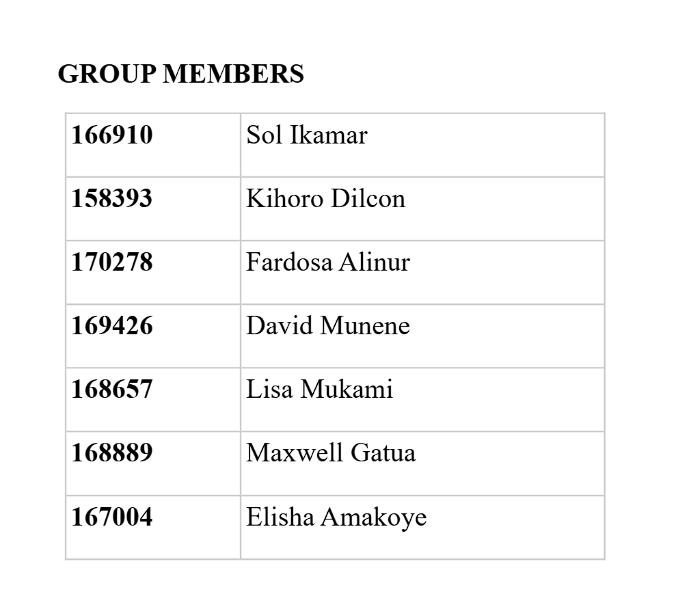

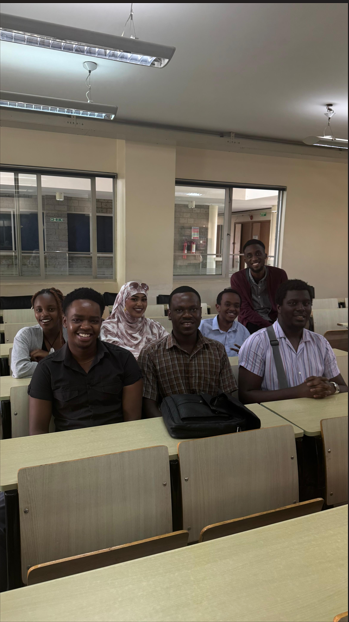

In [3]:
from PIL import Image
filename = list(uploaded_image.keys())[0]

img = Image.open(filename)
display(img)

filename = list(uploaded_image.keys())[1]

img = Image.open(filename)
display(img)

1. Download and upload the Diamonds Dataset from Kaggle.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded=files.upload()
df=pd.read_csv("diamonds.csv")

Saving diamonds.csv to diamonds (1).csv


2. After appropriately cleaning the data, carry out Exploratory Data Analysis
processes to retrieve at least 3 insights/observations from the dataset. Thereafter,
create a sample of randomly selected 12500 records for modelling and set it in a
dataframe named ‘diamonds_model’.

## Data cleaning




In [ ]:
display(df.head())
df.info()
print(df.isnull().sum())
print(df.duplicated().sum())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
display(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Exploratory data analysis

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Created sample of 12500 records

In [ ]:
diamonds_model = df.sample(n=12500, random_state=42)
display(diamonds_model.head())
print(f"Shape of the modeling dataframe: {diamonds_model.shape}")

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


Shape of the modeling dataframe: (12500, 10)


3. Use the linear regression algorithm to determine the price of diamonds given all
other features of carats, cut, colour etc. Include a suitable technique for verifying the
accuracy of the developed model. [Note: apply a suitable feature engineering
technique for all categorical variables]


In [ ]:

categorical_cols = ['cut', 'color', 'clarity']
diamonds_model_encoded = pd.get_dummies(diamonds_model, columns=categorical_cols, drop_first=True)
display(diamonds_model_encoded.head())

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,0.24,62.1,56.0,559,3.97,4.00,2.47,False,True,False,...,False,False,False,False,False,False,False,False,True,False
50052,0.58,60.0,57.0,2201,5.44,5.42,3.26,False,False,False,...,False,False,False,False,False,False,False,False,False,True
41645,0.40,62.1,55.0,1238,4.76,4.74,2.95,False,True,False,...,False,False,False,False,False,False,False,False,False,True
42377,0.43,60.8,57.0,1304,4.92,4.89,2.98,False,False,True,...,False,False,False,False,False,False,False,False,False,True
17244,1.55,62.3,55.0,6901,7.44,7.37,4.61,False,True,False,...,False,False,False,False,False,True,False,False,False,False



Splitting the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = diamonds_model_encoded.drop('price', axis=1)
y = diamonds_model_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (10000, 23)
Shape of X_test: (2500, 23)
Shape of y_train: (10000,)
Shape of y_test: (2500,)


## Model training




In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Verifying accuracy


In [ ]:
from sklearn.metrics import  r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9231955008559884


4. Apply Principal Component Analysis (PCA) to select the 2 most suitable features
among all continuous variables that have a strong correlation to the prices feature.
Model this relationship using the linear regression algorithm and verify its accuracy.

## Identify continuous features and calculate correlations


In [ ]:
numerical_cols = diamonds_model.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('price')
correlations = diamonds_model[numerical_cols].corrwith(diamonds_model['price'])
print("Correlation of continuous numerical features with 'price':")
print(correlations)

Correlation of continuous numerical features with 'price':
carat    0.921710
depth   -0.029825
table    0.143051
x        0.885799
y        0.887917
z        0.879541
dtype: float64


## Select features for pca




In [ ]:
strongly_correlated_features = correlations[abs(correlations) >= 0.7].index.tolist()
print("Continuous features with strong correlation to 'price':")
print(strongly_correlated_features)

Continuous features with strong correlation to 'price':
['carat', 'x', 'y', 'z']


## Apply pca




In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(diamonds_model[strongly_correlated_features])

print("Shape of the original strongly correlated features:", diamonds_model[strongly_correlated_features].shape)
print("Shape of the principal components:", principal_components.shape)

Shape of the original strongly correlated features: (12500, 4)
Shape of the principal components: (12500, 2)



Create a new DataFrame with the 2 principal components and the 'price' feature.


In [ ]:
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
principal_df['price'] = diamonds_model['price'].values
display(principal_df.head())

,PC1,PC2,price
0,-2.733581,0.149387,559
1,-0.531328,-0.106888,2201
2,-1.549021,0.012716,1238
3,-1.335566,-0.034853,1304
4,2.714132,0.062419,6901


## Split data




In [ ]:
from sklearn.model_selection import train_test_split

X = principal_df[['PC1', 'PC2']]
y = principal_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (10000, 2)
Shape of X_test: (2500, 2)
Shape of y_train: (10000,)
Shape of y_test: (2500,)


## Train linear regression model




In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Verify accuracy

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8409556243003311


5. To the model developed in question 3, fit 2 different regression models using Lasso
and Ridge regularisation techniques and validate accuracies for both models.

#Training Lasso model

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import  r2_score

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)




Lasso()

#Evaluate Lasso

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Model R-squared: {r2_lasso}")

Lasso Model R-squared: 0.84091044766399


#Training Ridge model


In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

## Evaluate ridge model


In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)


print(f"Ridge Model R-squared: {r2_ridge}")

Ridge Model R-squared: 0.840917183431188


## Compare models




In [ ]:
print("Linear Regression Model R-squared:", r2)
print("Lasso Model R-squared:", r2_lasso)
print("Ridge Model R-squared:", r2_ridge)


print("\nModel Performance Comparison:")
if r2 >= r2_lasso and r2 >= r2_ridge:
    print("Linear Regression performed best based on R-squared.")
elif r2_lasso >= r2 and r2_lasso >= r2_ridge:
    print("Lasso Regression performed best based on R-squared.")
else:
    print("Ridge Regression performed best based on R-squared.")


Linear Regression Model R-squared: 0.8409556243003311
Lasso Model R-squared: 0.84091044766399
Ridge Model R-squared: 0.840917183431188

Model Performance Comparison:
Linear Regression performed best based on R-squared.


6. Comparing the 4 models developed in questions 3, 4 and 5 which registered the
highest accuracy? What is likely to lead to this performance?


Linear regression registered the highest accuracy since the model utilizes the full set of engineered features compared to PCA which only utilizes 2 features whereas Lasso and Ridge are primarily used to prevent overfitting